In [1]:
import re
import pandas as pd
import numpy as np
import datetime

In [2]:
def parser(file):
    #Initialize list
    lines = []
    
    #Open File
    with open(file, 'r') as file:
        for line in file:
            lines.append(line.rstrip('\n'))

    #Extract Date
    Date = (re.split('[\s]{4,}', lines[1].strip()))
    Date = Date[0]
    Date = Date.replace('Run Date: ', '')

    #Extract indices to cut list
    indices = [i for i, s in enumerate(lines) if '-----' in s]
    indicest = [i for i, s in enumerate(lines) if 'TOTAL' in s]

    #Create list with only well licenses
    df1 = lines[(indices[0]+1):(indicest[0]-1)]

    dfsplit = lines[indices[0]]

    def find(s, ch):
        return [i for i, ltr in enumerate(s) if ltr == ch]

    cut = find(dfsplit,' ')

    df2 = []
    for line in df1:
        df2.append(line[0:cut[0]])
        df2.append(line[cut[0]:cut[1]])
        df2.append(line[cut[1]:cut[2]])
        df2.append(line[cut[2]:cut[3]])
        df2.append(line[cut[3]:cut[4]])
        df2.append(line[cut[4]:cut[5]])
        df2.append(line[cut[5]:cut[6]])
        df2.append(line[cut[6]:cut[7]])
        df2.append(line[cut[7]::])

    #Create a list without all spaces
    df3 = []
    for line in df2:
        df3.extend(re.split('[\s]{5,}', line.strip()))

    df3 = [df3[x:x+9] for x in range(0, len(df3), 9)]
    df3

    #create a dataframe out of the list
    if df3 != []:
        data1 = pd.DataFrame(df3)
        data1.set_axis(['BA ID', 'LICENSEE', 'LICENCE', 'FIELD CENTRE', 'ACTIVITY START DATE', 'PIPELINE LINE NUMBER', 'FROM', 'TO', 'LENGTH'], axis = 1, inplace=True)
        data1['DATE'] = Date

        return data1

In [3]:
import os

from pathlib import Path

directory_in_str = "Data/ST100/"

directory = os.fsencode(directory_in_str) 

columns = ['BA ID', 'LICENSEE', 'LICENCE', 'FIELD CENTRE', 'ACTIVITY START DATE', 'PIPELINE LINE NUMBER', 'FROM', 'TO', 'LENGTH']

df = pd.DataFrame(columns=columns)

ext = ['.txt','.TXT']

for file in os.listdir(directory): 
    filename = os.fsdecode(file) 
    if filename.endswith('.txt'):
        print(filename) 
        data = parser(os.path.join(directory_in_str, filename))
        df = df.append(data, ignore_index=True, sort=False)
        continue 
    else: 
        continue

23298.txt
29946.txt
21490.txt
12555.txt
11310.txt
9743.txt
28103.txt
22723.txt
17427.txt
11075.txt
15195.txt
12873.txt
9999.txt
20417.txt
29897.txt
14321.txt
6256.txt
4841.txt
18667.txt
24316.txt
29991.txt
1659.txt
4208.txt
30258.txt
13079.txt
15909.txt
10498.txt
8967.txt
1733.txt
22107.txt
6159.txt
5179.txt
16177.txt
2294.txt
18382.txt
16255.txt
16050.txt
16567.txt
32148.txt
18751.txt
11053.txt
14418.txt
19710.txt
30853.txt
19644.txt
26116.txt
3184.txt
7805.txt
2392.txt
29166.txt
23644.txt
4808.txt
24586.txt
11344.txt
19138.txt
10843.txt
25802.txt
21676.txt
28487.txt
11766.txt
6327.txt
26746.txt
22705.txt
11328.txt
12958.txt
3471.txt
11816.txt
27459.txt
26151.txt
28771.txt
27961.txt
17570.txt
10259.txt
7927.txt
7740.txt
11101.txt
18133.txt
9689.txt
14196.txt
15711.txt
2759.txt
996.txt
6503.txt
9411.txt
2648.txt
3847.txt
32236.txt
14464.txt
21565.txt
4371.txt
22499.txt
13771.txt
13460.txt
23369.txt
11941.txt
24509.txt
24113.txt
2300.txt
28788.txt
20481.txt
11347.txt
24855.txt
15211.txt

In [4]:
df

,BA ID,LICENSEE,LICENCE,FIELD CENTRE,ACTIVITY START DATE,PIPELINE LINE NUMBER,FROM,TO,LENGTH,DATE
0,0HE9,Canadian Natural Resources Limited,47647,Medicine Hat,01 Oct 2019 08:10:00 AM,70,12-06-011-16W4,11-06-011-16W4,0.39,27 Sep 2019
1,0HE9,Canadian Natural Resources Limited,55139,Bonnyville,01 Oct 2019 08:10:00 AM,4,16-26-061-04W4,15-26-061-04W4,0.47,27 Sep 2019
2,A7YW,Rangeland Midstream Canada Ltd.,61208,Slave Lake,30 Sep 2019 08:09:00 AM,1,14-29-073-24W4,15-32-073-24W4,1.6,27 Sep 2019
3,A7YW,Rangeland Midstream Canada Ltd.,61208,Slave Lake,30 Sep 2019 08:09:00 AM,2,15-32-073-24W4,16-26-074-25W4,12.87,27 Sep 2019
4,A7YW,Rangeland Midstream Canada Ltd.,61208,Slave Lake,30 Sep 2019 08:09:00 AM,3,16-26-074-25W4,12-34-074-25W4,3.2,27 Sep 2019
...,...,...,...,...,...,...,...,...,...,...
15389,0205,Pembina Pipeline Corporation,59894,St. Albert,05 Mar 2018 06:00:00 AM,1,08-33-062-20W5,06-36-062-20W5,6,03 Mar 2018
15390,0HE9,Canadian Natural Resources Limited,26307,Grande Prairie,09 Mar 2016 03:46:00 PM,41,13-05-077-10W6,04-08-077-10W6,0.18,09 Mar 2016
15391,0026,Encana Corporation,44056,Grande Prairie,09 Mar 2016 09:18:00 AM,30,06-06-072-08W6,06-06-072-08W6,0.04,09 Mar 2016
15392,0026,Encana Corporation,44056,Grande Prairie,09 Mar 2016 09:18:00 AM,31,10-19-072-08W6,10-19-072-08W6,0.03,09 Mar 2016


In [9]:
#Export to CSV
df.to_csv(r'ST100-Historical.csv', index = False)

In [11]:
datac = pd.read_csv('ST100-Historical.csv')

#Conversion of Surface Location to numbers only in order to search ATS values and match them to latitude and longitude
datac['ATS-FROM'] = datac['FROM'].str.replace(r'[^0-9]+', '')
datac['ATS-TO'] = datac['TO'].str.replace(r'[^0-9]+', '')
datac['ATS-FROM'] = datac['ATS-FROM'].str[-8:]
datac['ATS-TO'] = datac['ATS-TO'].str[-8:]

nan_value = float("NaN")
datac.replace("", nan_value, inplace=True)
datac.dropna(subset = ["ATS-FROM"], inplace=True)

#Conversion to integers
datac['ATS-FROM'] = datac['ATS-FROM'].astype('int64')
datac['ATS-TO'] = datac['ATS-TO'].astype('int64')


In [12]:
#Conversion to Lat/Long
convcomp = pd.read_csv('ConvComp.csv')
convcomp['ConvDF'] = convcomp['ConvDF'].astype('int64')
dfm = pd.merge(datac, convcomp, how='left', left_on='ATS-FROM', right_on='ConvDF')
dfm2 = pd.merge(dfm, convcomp, how='left', left_on='ATS-TO', right_on='ConvDF')

dfm2

#datac['DATE'] = datac['DATE'].astype('datetime64')
#datac['WEEK'] = datac['DATE'].dt.week
#datac['MONTH'] = datac['DATE'].dt.month
#datac['YEAR'] = datac['DATE'].dt.year

,BA ID,LICENSEE,LICENCE,FIELD CENTRE,ACTIVITY START DATE,PIPELINE LINE NUMBER,FROM,TO,LENGTH,DATE,ATS-FROM,ATS-TO,ConvDF_x,Lat_x,Long_x,ConvDF_y,Lat_y,Long_y
0,0HE9,Canadian Natural Resources Limited,47647,Medicine Hat,01 Oct 2019 08:10:00 AM,70,12-06-011-16W4,11-06-011-16W4,0.39,27 Sep 2019,6011164,6011164,6011164,49.880586,-112.165662,6011164.0,49.880586,-112.165662
1,0HE9,Canadian Natural Resources Limited,55139,Bonnyville,01 Oct 2019 08:10:00 AM,4,16-26-061-04W4,15-26-061-04W4,0.47,27 Sep 2019,26061044,26061044,26061044,54.304305,-110.480399,26061044.0,54.304305,-110.480399
2,A7YW,Rangeland Midstream Canada Ltd.,61208,Slave Lake,30 Sep 2019 08:09:00 AM,1,14-29-073-24W4,15-32-073-24W4,1.60,27 Sep 2019,29073244,32073244,29073244,55.351870,-113.647696,32073244.0,55.366324,-113.647716
3,A7YW,Rangeland Midstream Canada Ltd.,61208,Slave Lake,30 Sep 2019 08:09:00 AM,2,15-32-073-24W4,16-26-074-25W4,12.87,27 Sep 2019,32073244,26074254,32073244,55.366324,-113.647716,26074254.0,55.439118,-113.724658
4,A7YW,Rangeland Midstream Canada Ltd.,61208,Slave Lake,30 Sep 2019 08:09:00 AM,3,16-26-074-25W4,12-34-074-25W4,3.20,27 Sep 2019,26074254,34074254,26074254,55.439118,-113.724658,34074254.0,55.453578,-113.750291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15338,205,Pembina Pipeline Corporation,59894,St. Albert,05 Mar 2018 06:00:00 AM,1,08-33-062-20W5,06-36-062-20W5,6.00,03 Mar 2018,33062205,36062205,33062205,54.406759,-116.926516,36062205.0,54.406761,-116.851533
15339,0HE9,Canadian Natural Resources Limited,26307,Grande Prairie,09 Mar 2016 03:46:00 PM,41,13-05-077-10W6,04-08-077-10W6,0.18,09 Mar 2016,5077106,8077106,5077106,55.643240,-119.500158,8077106.0,55.657695,-119.500148
15340,26,Encana Corporation,44056,Grande Prairie,09 Mar 2016 09:18:00 AM,30,06-06-072-08W6,06-06-072-08W6,0.04,09 Mar 2016,6072086,6072086,6072086,55.207015,-119.205354,6072086.0,55.207015,-119.205354
15341,26,Encana Corporation,44056,Grande Prairie,09 Mar 2016 09:18:00 AM,31,10-19-072-08W6,10-19-072-08W6,0.03,09 Mar 2016,19072086,19072086,19072086,55.250532,-119.205358,19072086.0,55.250532,-119.205358


In [13]:
#Export to CSV
dfm2.to_csv(r'ST100-Historical.csv', index = False)

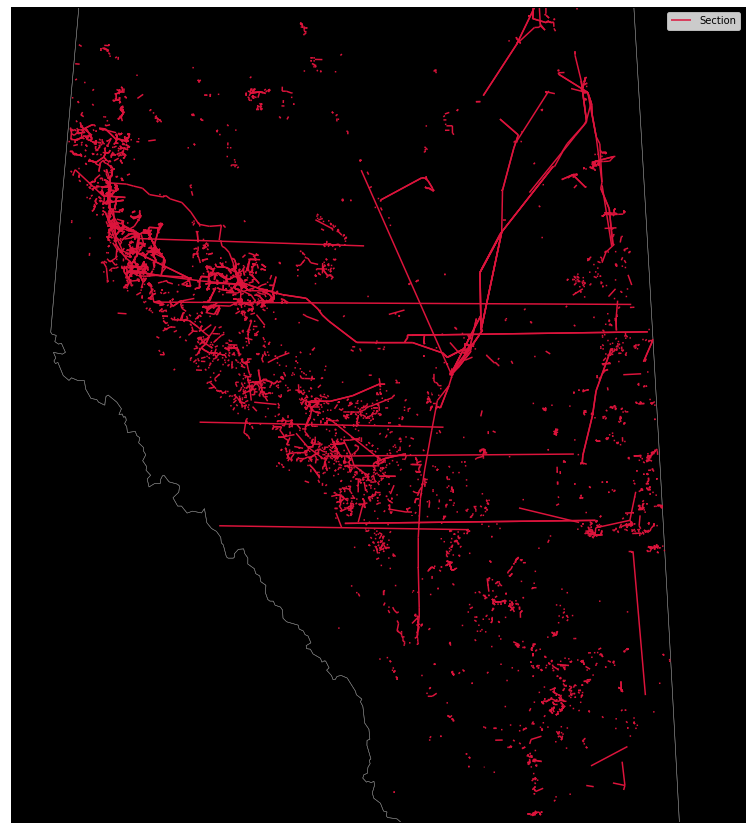

In [15]:
import numpy as np; np.random.seed(42)
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

plt.figure(figsize=(15,15))

m = Basemap(llcrnrlon=-120,llcrnrlat=49,urcrnrlon=-108, urcrnrlat=57,
             resolution='i', projection='cass', lat_0 = 51, lon_0 = -114)

#m.drawcoastlines(linewidth=0.72, color='gray')
#m.drawcountries(zorder=0, color='gray')
#m.bluemarble()
m.drawmapboundary(fill_color='black')
m.drawstates(color='grey')

Long_x, Lat_x = m(dfm2.Long_x.values, dfm2.Lat_x.values)
Long_y, Lat_y = m(dfm2.Long_y.values, dfm2.Lat_y.values)

pts = np.c_[Long_x, Lat_x, Long_y, Lat_y].reshape(len(Long_x), 2, 2)
plt.gca().add_collection(LineCollection(pts, color="crimson", label="Section"))

m.plot(Long_x, Lat_x, ls="")
m.plot(Long_y, Lat_y, ls="")

plt.legend()
plt.savefig('ST100-Historical.png')

